In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
# Load dataset
file_path = ("Mall_Customers.csv")
dataset = pd.read_csv(file_path)

print(f"Dataset Loaded Successfully!\nShape: {dataset.shape}")
print("\nAvailable Columns:", list(dataset.columns))

Dataset Loaded Successfully!
Shape: (200, 5)

Available Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [5]:
# Selecting relevant features
features = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Apply KMeans clustering
kmeans_model = KMeans(
    n_clusters=5, 
    init='k-means++', 
    random_state=101
)

cluster_labels = kmeans_model.fit_predict(features)
dataset['Cluster_ID'] = cluster_labels

In [7]:
# Calculate performance metrics
inertia_val = kmeans_model.inertia_
silhouette_val = silhouette_score(features, cluster_labels)

print("\nModel Evaluation:")
print("• Inertia (WCSS):", round(inertia_val, 2))
print("• Silhouette Score:", f"{silhouette_val:.3f}")


Model Evaluation:
• Inertia (WCSS): 82608.64
• Silhouette Score: 0.377


In [8]:
# Check if any true labels are available for evaluation
if any(col in dataset.columns for col in ['Label', 'Customer_Segment']):
    ref_label = dataset['Label'] if 'Label' in dataset.columns else dataset['Customer_Segment']
    cm = confusion_matrix(ref_label, cluster_labels)
    
    plt.figure(figsize=(5.5, 4))
    sns.heatmap(cm, annot=True, cmap='crest', fmt='d')
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Cluster")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo ground truth labels found — skipping confusion matrix.")


No ground truth labels found — skipping confusion matrix.


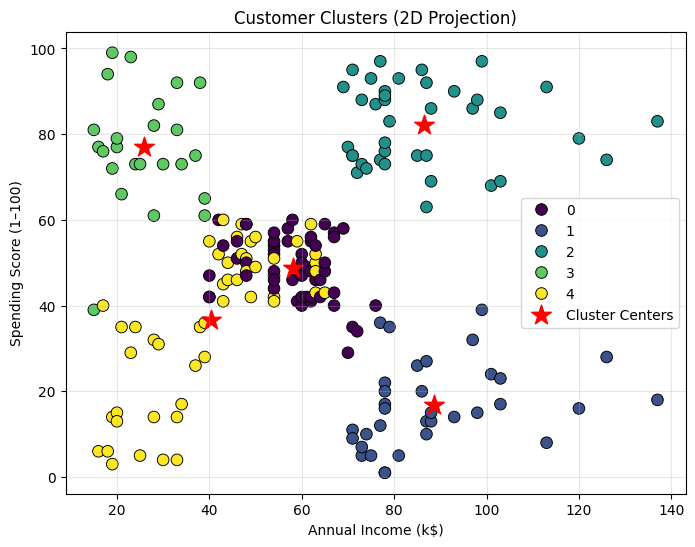

In [9]:
# 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_ID',
    data=dataset,
    palette='viridis',
    s=70,
    edgecolor='black'
)
plt.scatter(
    kmeans_model.cluster_centers_[:, 1],
    kmeans_model.cluster_centers_[:, 2],
    s=220,
    color='red',
    marker='*',
    label='Cluster Centers'
)
plt.title("Customer Clusters (2D Projection)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

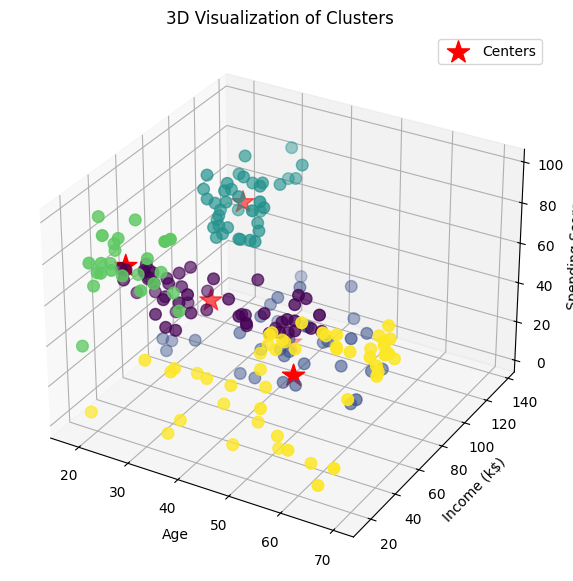

In [10]:
# 3D Cluster Visualization
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    dataset['Age'],
    dataset['Annual Income (k$)'],
    dataset['Spending Score (1-100)'],
    c=dataset['Cluster_ID'],
    cmap='viridis',
    s=70
)

centroids = kmeans_model.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    s=280,
    c='red',
    marker='*',
    label='Centers'
)
ax.set_xlabel("Age")
ax.set_ylabel("Income (k$)")
ax.set_zlabel("Spending Score")
ax.set_title("3D Visualization of Clusters")
ax.legend()
plt.show()

In [11]:
# Cluster Summary
print("\nCluster Mean Statistics:")
summary = dataset.groupby('Cluster_ID')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(summary)


Cluster Mean Statistics:
                  Age  Annual Income (k$)  Spending Score (1-100)
Cluster_ID                                                       
0           33.396226           58.056604               48.773585
1           41.647059           88.735294               16.764706
2           32.692308           86.538462               82.128205
3           25.250000           25.833333               76.916667
4           54.060000           40.460000               36.720000


In [12]:
# Save results
output_csv = 'Customer_Segments_Analyzed.csv'
dataset.to_csv(output_csv, index=False)
print(f"\n✅ Process complete. Results saved as '{output_csv}'.")


✅ Process complete. Results saved as 'Customer_Segments_Analyzed.csv'.
